<h1> Statistical analysis of housing prices in Boston</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib
%matplotlib inline

In [2]:
boston = load_boston()
# boston_dataset is a dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
#these are the columns 
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

<br>this is the meaning of the columns </br>
<br>CRIM: Per capita crime rate by town</br>
<br>ZN: Proportion of residential land zoned for lots over 25,000 sq. ft</br>
<br>INDUS: Proportion of non-retail business acres per town</br>
<br>CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</br>
<br>NOX: Nitric oxide concentration (parts per 10 million)</br>
<br>RM: Average number of rooms per dwelling</br>
<br>AGE: Proportion of owner-occupied units built prior to 1940</br>
<br>DIS: Weighted distances to five Boston employment centers</br>
<br>RAD: Index of accessibility to radial highways</br>
<br>PTRATIO:Pupil-Teacher-Ratio by town</br>
<br>TAX: Full-value property tax rate per $10,000 </br>
<br>B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town</br>
<br>LSTAT: Percentage of lower status of the population </br>
<br> </br>
<br>I don't think the column names are good, therefore I change them</br>

In [4]:
header = ['Crime_Rate',
          'land_zones_for_lots',
          'non-retail_business_acres_per_town',
          'river',
          'NOX_concentration',
          '#_rooms',
          'unit_built_prior_1940',
          'distance_employment_center',
          'Index_accessibility_highway',
          'PTRATIO',
          'TAX_Rate',
          'Value_african_american',
          'Lower_status_percentage']

<br>now import the data</br>
<br>I do not fully understand why the % of black people is calculated that way</br>

In [5]:
boston2 = pd.DataFrame(boston.data, columns = header)
boston2.head(10)

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


<br>the value of the houses is still missing, we have to add it, it's the target variable</br>
<br>MDEV - median value of the house in 10000 $ - dataset is from 1970 therefore the low price!!!</br>

In [6]:
boston2['Price'] =boston.target
boston2.head()

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br>now check for missing values as these values have to be erased</br>

In [7]:
check = boston2[(boston2['Crime_Rate'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [8]:
check = boston2[(boston2['land_zones_for_lots'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [9]:
check = boston2[(boston2['non-retail_business_acres_per_town'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [10]:
check = boston2[(boston2['river'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [11]:
check = boston2[(boston2['NOX_concentration'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [12]:
check = boston2[(boston2['#_rooms'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [13]:
check = boston2[(boston2['unit_built_prior_1940'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [14]:
check = boston2[(boston2['distance_employment_center'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [15]:
check = boston2[(boston2['Index_accessibility_highway'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [16]:
check = boston2[(boston2['PTRATIO'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [17]:
check = boston2[(boston2['TAX_Rate'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [18]:
check = boston2[(boston2['Value_african_american'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [19]:
check = boston2[(boston2['Lower_status_percentage'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


In [20]:
check = boston2[(boston2['Price'].isnull() == True)]
check

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price


<br>there are no missing values, great :)</br>

<br>overview about the dataset</br>

In [21]:
boston2.describe()

,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<br>graphical overview as histogram</br>
<br>now we can see the distribution of every variable</br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016EABAF4128>,
      dtype=object)

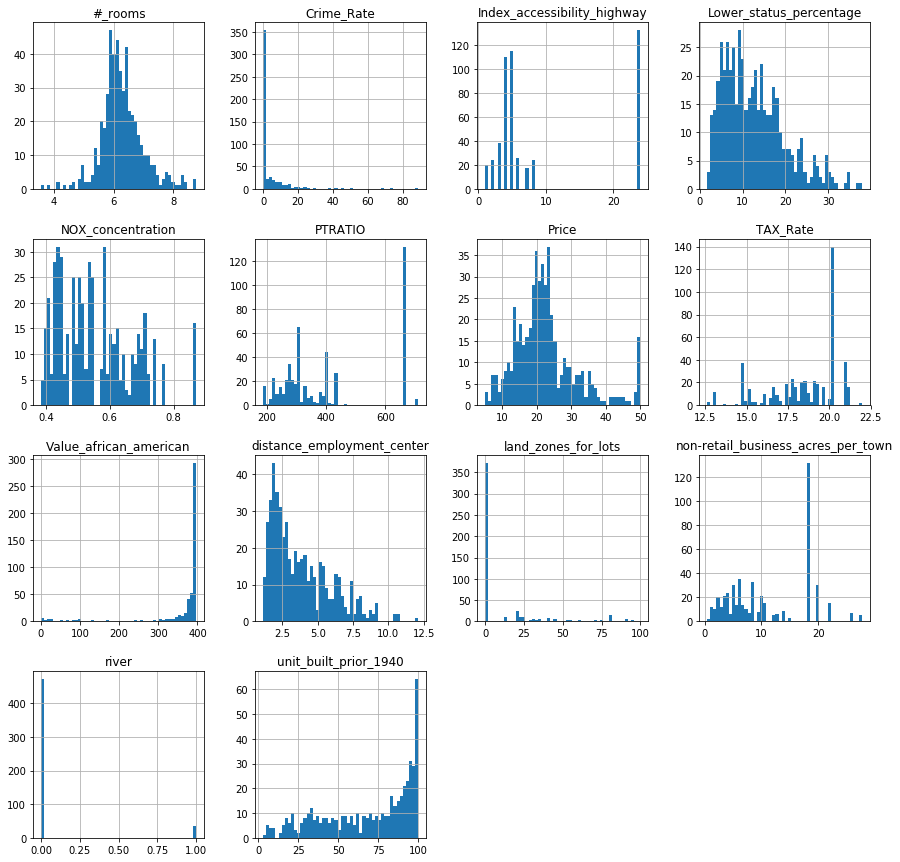

In [22]:
boston2.hist(bins = 50, figsize =(15,15) )

<br>correlation between the different values</br>
<br>set the size of the figure</br>

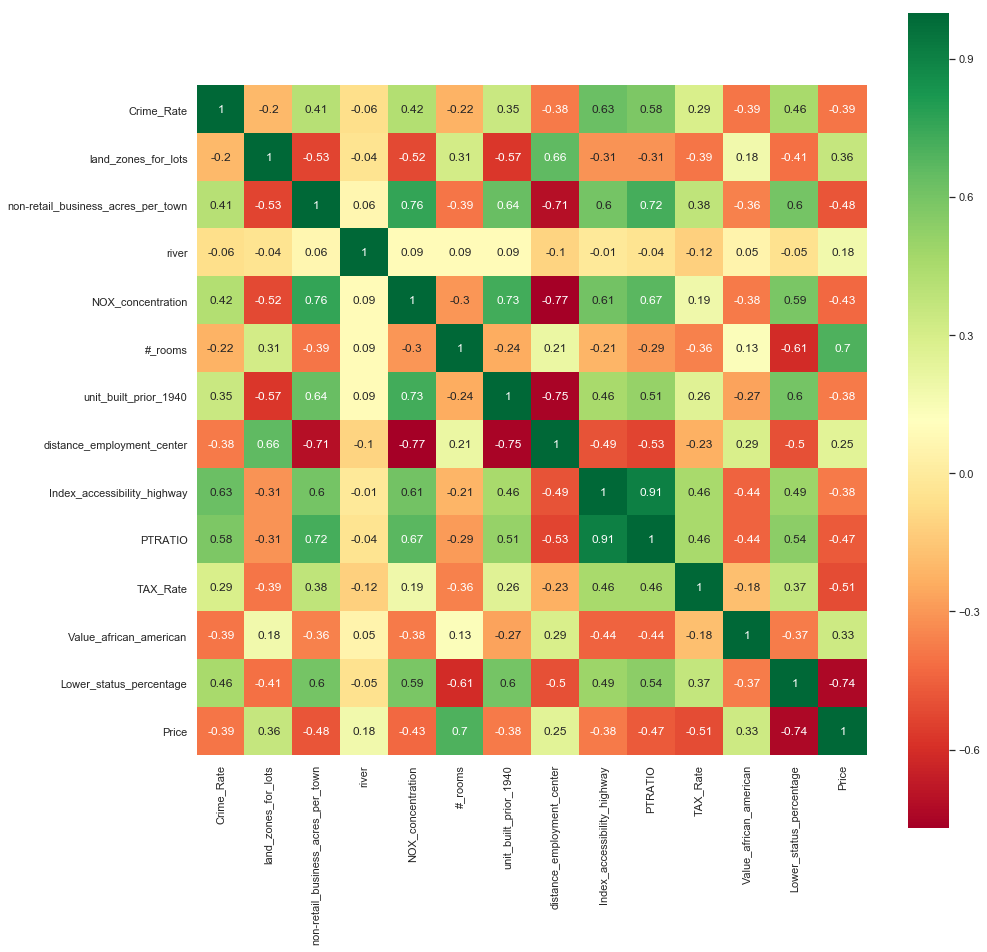

In [23]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(boston2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

<br>now include only strong correlation</br>
<br>they have to be either near 1 (positive correlation) or near -1 (negative correlation)</br>
<br>as this is all about the price of apartments we have to check for Price</br>
<br>lower status percentage -0,74: poorer environment means cheaper home</br>
<br>tax rate - 0,51: rich people with expensive houses will settle at places with low taxes</br>
<br>#_rooms 0,7: more rooms means bigger house means </br>
<br>non-retail_business_acres_per_town: -0,48: no retail probably means industry and no one wants to live there</br>
<br>PT-Ratio: -0,47: expansive houses are in neighborhoods with good schools which have a low PT Ratio</br>
<br>index_accessibility_highway correlates very high with PRRatio --> danger of multicollinearity</br>
<br>meaning two features measuring the same thing --> we are only using PR-Ratio</br>
<br>now scatter again with the highly correlated variables;</br>

In [24]:
boston3 = boston2[['Price',
                    'Lower_status_percentage',
                    'TAX_Rate',
                    '#_rooms',
                    'non-retail_business_acres_per_town',
                    'PTRATIO'
                    ]]
boston3.head()

,Price,Lower_status_percentage,TAX_Rate,#_rooms,non-retail_business_acres_per_town,PTRATIO
0,24.0,4.98,15.3,6.575,2.31,296.0
1,21.6,9.14,17.8,6.421,7.07,242.0
2,34.7,4.03,17.8,7.185,7.07,242.0
3,33.4,2.94,18.7,6.998,2.18,222.0
4,36.2,5.33,18.7,7.147,2.18,222.0


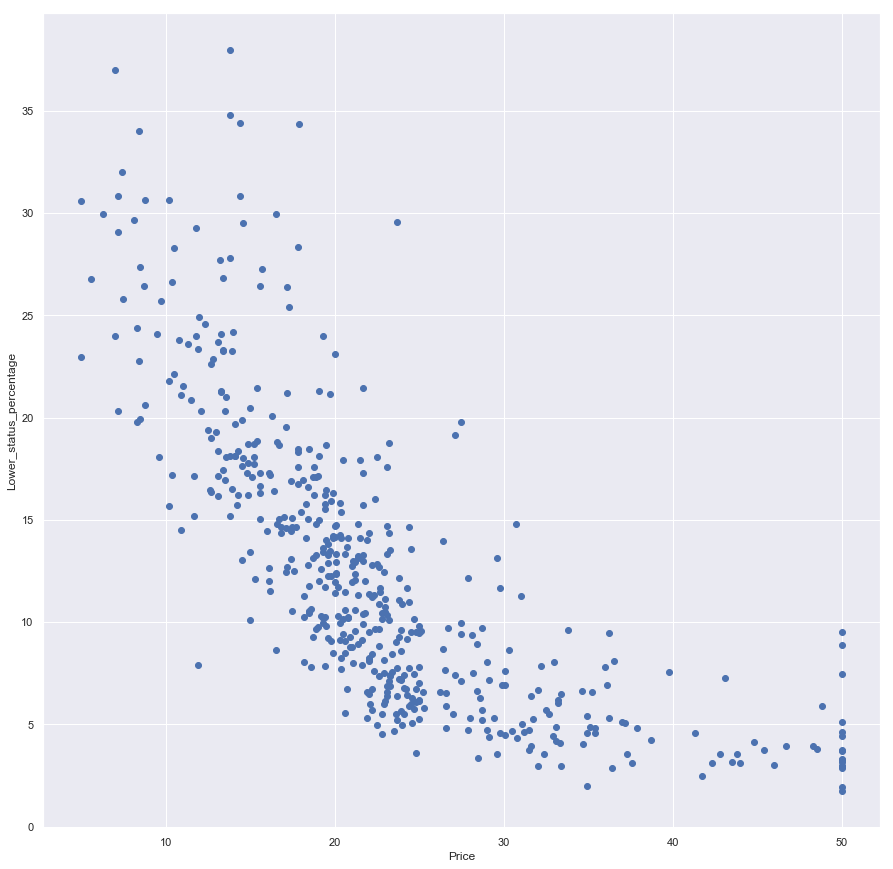

In [25]:
plt.scatter(boston3['Price'], boston3['Lower_status_percentage'])
plt.xlabel('Price')
plt.ylabel('Lower_status_percentage')
plt.show()

<br>a linear connection between Price and lower status percentage</br>

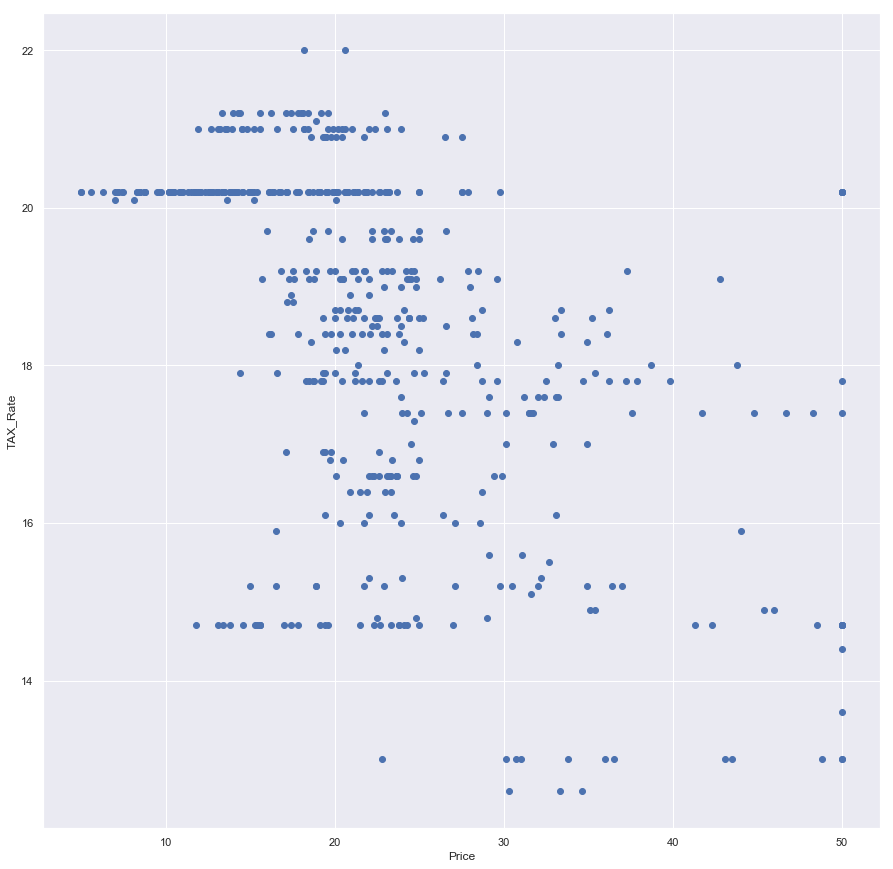

In [26]:
plt.scatter(boston3['Price'], boston3['TAX_Rate'])
plt.xlabel('Price')
plt.ylabel('TAX_Rate')
plt.show()

<br>difficult relationship between both variables, but it seems as there is a linear indication</br>
<br>high taxes = low prices</br>

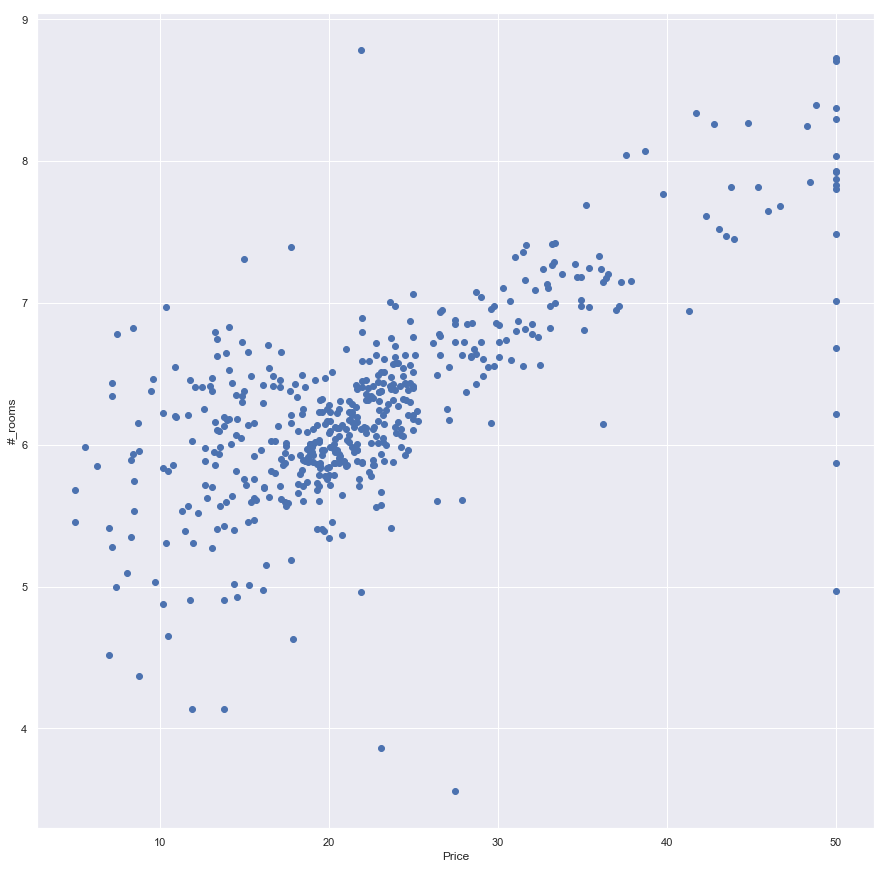

In [27]:
plt.scatter(boston3['Price'], boston3['#_rooms'])
plt.xlabel('Price')
plt.ylabel('#_rooms')
plt.show()

<br>clearly a linear function between price and #rooms </br>

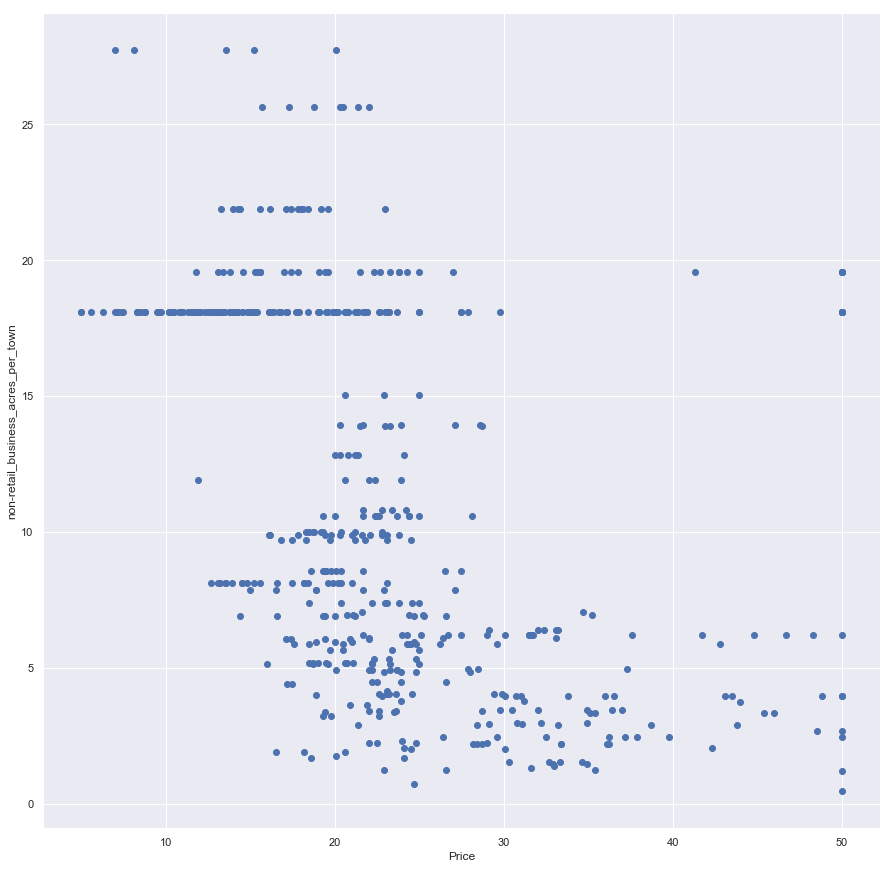

In [28]:
plt.scatter(boston3['Price'], boston3['non-retail_business_acres_per_town'])
plt.xlabel('Price')
plt.ylabel('non-retail_business_acres_per_town')
plt.show()

<br>also difficult but linear tendency</br>

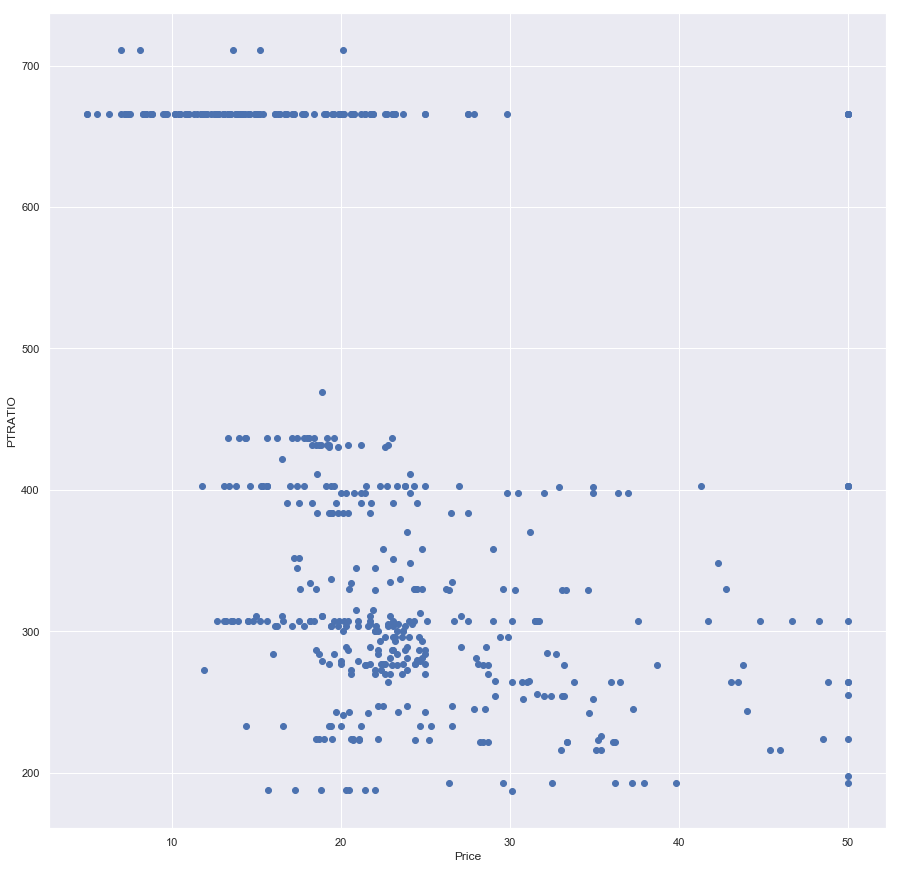

In [29]:
plt.scatter(boston3['Price'], boston3['PTRATIO'])
plt.xlabel('Price')
plt.ylabel('PTRATIO')
plt.show()

<br>also difficult but also linear tendency, seems like there is no middle with 450 - 650 Pupils/ Teacher</br>

<br>now create a regression model</br>
<br>I use scitlearn for this</br>
<br>i need to split the data in X(Features) and Y (Target)</br>

In [30]:
y = boston3['Price']
x = boston3.drop(['Price'],1).values

<br>now split into train and test data to see after model building how good the model is</br>
<br>random_state sets starting point so that we can reproduce the same results every time</br>
<br>I splitt the dataset into 75% of data for training & 25% for testing</br>

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
#activate linear regression
lin_reg = LinearRegression()
#now fit the training data to the linear regression
lin_reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<br>now we have a modell but to evaluate the modell against the reality we have to predict the Price </br>
<br>based on that modell for the test data</br>

In [32]:
y_predict = lin_reg.predict(x_test)
y_predict

array([27.8748385 , 28.03198758, 18.75314422, 23.41888983, 18.86383363,
       21.60292844, 28.06077801, 19.40643008, 20.46553861, 26.03004193,
       25.39190341, 30.208675  , 20.56338313, 24.30568188, 22.43136932,
       18.61099596, 15.81873066, 37.32214921, 28.56360154, 11.30126259,
       21.39969344, 21.51536002, 25.8686188 , 26.05880949, 29.45168961,
       12.38358195, 15.1593599 , 22.50602826, 35.37791184, 12.63619183,
       27.8409386 , 16.1081061 , 38.34589937, 18.4018997 , 25.39614825,
       20.07763475, 17.92921673, 29.99729779,  6.58145979, 18.76811299,
       27.12611964, 24.80728437, 27.85730171, 13.52803563, 17.21651152,
       16.75527212, 38.20826915, 17.1248955 , 27.30585058, 22.0201395 ,
       23.90484648, 25.46372626, 27.44786677, 27.33664547,  6.5799466 ,
       25.69967536,  8.909315  , 26.20167447, 18.13880844, 35.9788128 ,
       19.82991761, 27.59536951, 14.49329377, 18.04387332,  9.49519886,
       30.43766571, 37.18660397, 27.99285104, 25.48482688, 25.31

<br>do these values differ?</br>

In [33]:
comparison = pd.DataFrame(y_test)
comparison.rename(columns = {'Price':'Price_real'}, inplace = True)
comparison['Price_predicted']=y_predict
comparison['error']=comparison.Price_real - comparison.Price_predicted
comparison

,Price_real,Price_predicted,error
307,28.2,27.874839,0.325161
343,23.9,28.031988,-4.131988
47,16.6,18.753144,-2.153144
67,22.0,23.418890,-1.418890
362,20.8,18.863834,1.936166
132,23.0,21.602928,1.397072
292,27.9,28.060778,-0.160778
31,14.5,19.406430,-4.906430
218,21.5,20.465539,1.034461
90,22.6,26.030042,-3.430042


<br>also plot it</br>
<br>the perfect model should create a line as predicted and real values should be identical </br>

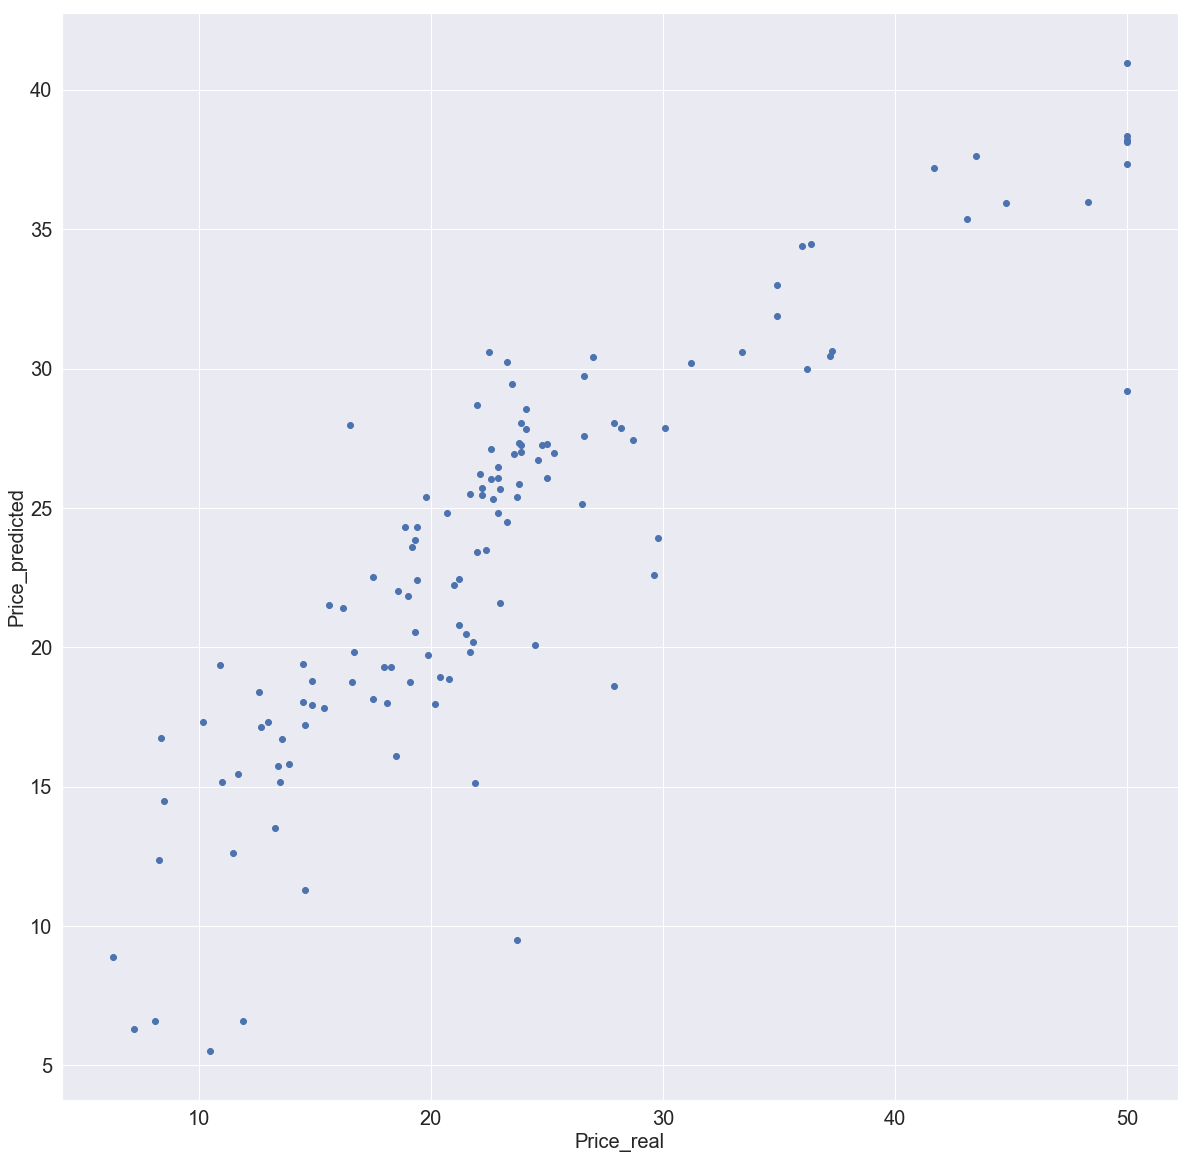

In [49]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(20,20))
plt.scatter(y_test, y_predict)
plt.xlabel('Price_real')
plt.ylabel('Price_predicted')
plt.show()

<br>we have cases where the modell is good and also where it does not work well</br>
<br>R² is value that can tell us how good the modell is, it defines the amount of variance in the target </br>
<br>(=Price) that can be explained by the 5 Variables we have put into the modell</br>

In [35]:
r_squared_train = lin_reg.score(x_train, y_train)
r_squared_test = lin_reg.score(x_test, y_test)
print("R²-train: {}".format(r_squared_train))
print("R²-test: {}".format(r_squared_test))

R²-train: 0.6557456371776518
R²-test: 0.7245766903192732


<br>so more than 72% can be explained by our variables</br>
<br>interestingly the train data performs worse than the test data</br>
<br>this means we avoided overfitting</br>
<br>but what is the equation?</br>

In [36]:
#intercept
print(lin_reg.intercept_)
#slope
print(lin_reg.coef_)

24.400147776253327
[-5.93807116e-01 -9.10427830e-01  3.65507374e+00  2.71389366e-02
 -1.77852494e-03]


<br>so this is the equation:<br>
<br>Price = 24,4 -0.59380*'Lower_status_percentage' -0.91042*'TAX_Rate' + 3.655074*'#_rooms'</br>
<br>        +0.027139*'non-retail_business_acres_per_town' -0.001779*'PTRATIO'</br>


<br>but what about the rest? Maybe a cluster analysis could be an alternative way of describing the data </br>
<br>first standardize data to give each variable the same impact </br>

In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(boston2)

<br>now figure out how many clusters are okay;</br>
<br>check for 1 - 10 clusters</br>
<br>calculate the sum² of distance for each cluster version (1-10)</br>
<br>with increasing k sum2 of distance will getting lower, the area with the biggest drop shows the </br>
<br>amount of clusters we need (elbow criteria) --> so lets plot sum2 of distance & k</br>

In [38]:
sum_squared_distance = []
k = range(1,10)
for i in k:
    km= KMeans(n_clusters=i, random_state = 0).fit(boston2)
    sum_squared_distance.append(km.inertia_)
sum_squared_distance  


[19401063.96659758,
 5764994.26870575,
 3068499.4545669407,
 1814437.5009567766,
 1475549.4826214896,
 1166645.01889241,
 990572.8830814835,
 879284.6562494119,
 783869.4747196867]

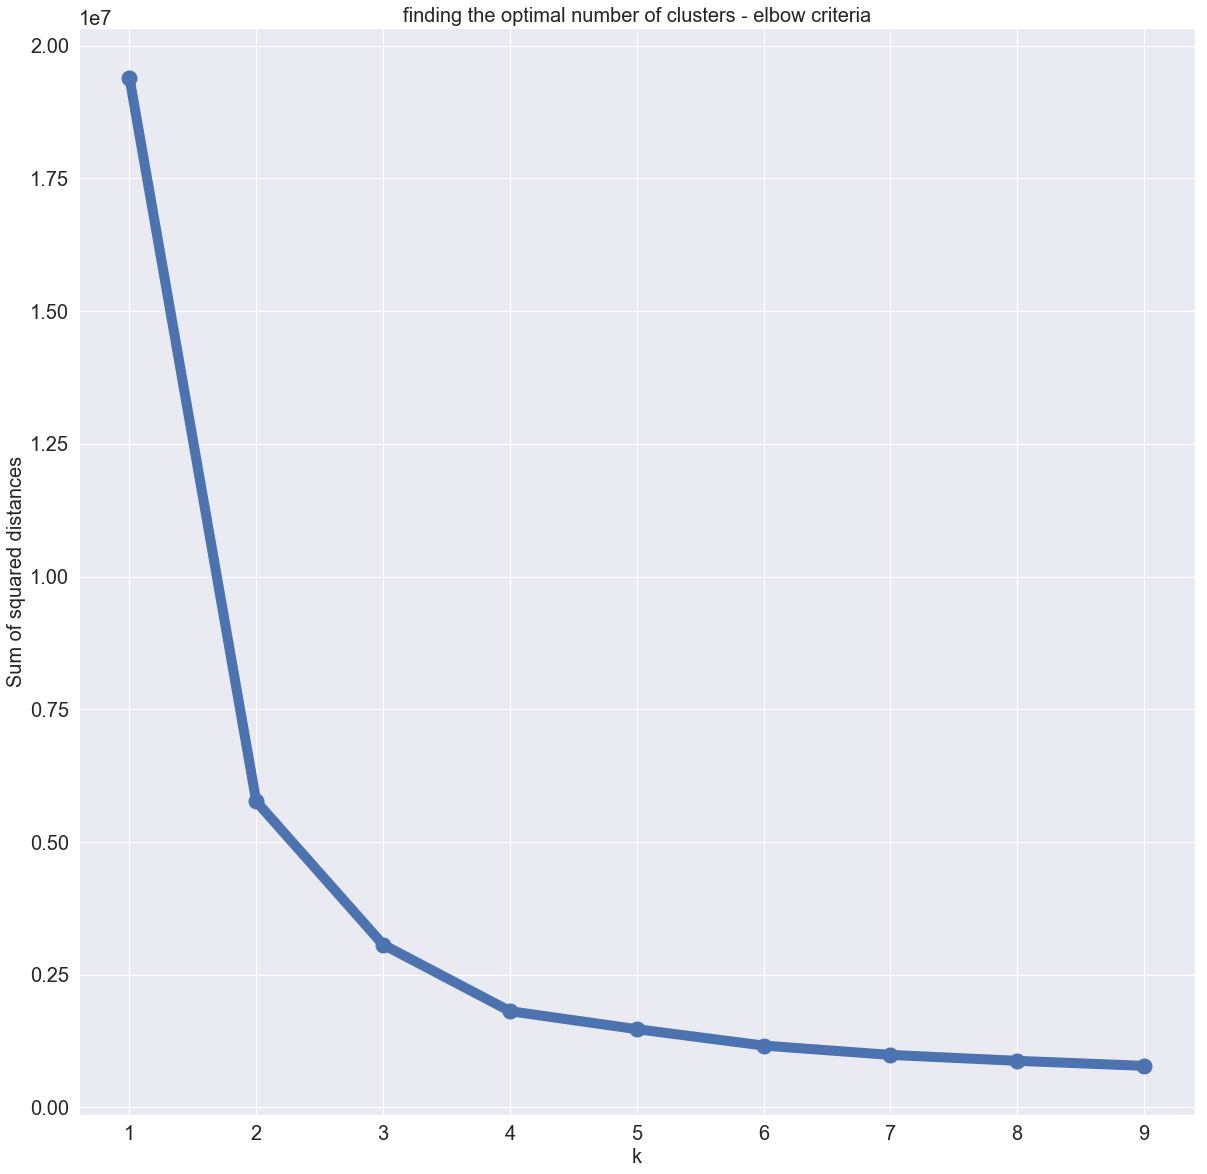

In [39]:

matplotlib.rc('axes', titlesize=20, labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(20,20))
plt.plot(k, sum_squared_distance, 'o-', linewidth = 10, markersize = 15)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('finding the optimal number of clusters - elbow criteria')
plt.show()
#go for 3 clusters

In [40]:
kclusters = 3
#drop all non relevant rows
#clustering is based on euklidian distance therefore you need at least two columns with numbers
clustering = boston2
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)
#list of all cluster labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<br>adding the cluster labels so that you can see which entry has what cluster</br>

In [41]:
clustering.insert(0,'Clusterlabels', kmeans.labels_)

In [42]:
cluster_overview = clustering.groupby('Clusterlabels').count()
cluster_overview = cluster_overview.drop( ['Price',
                                          'land_zones_for_lots',
                                          'non-retail_business_acres_per_town',
                                          'river',
                                          'NOX_concentration',
                                          '#_rooms',
                                          'unit_built_prior_1940',
                                          'distance_employment_center',
                                          'Index_accessibility_highway',
                                          'PTRATIO',
                                          'TAX_Rate',
                                          'Value_african_american',
                                          'Lower_status_percentage'],1)
cluster_overview = cluster_overview.rename(columns = {'Crime_Rate': 'count'})
#calculate percentage;
cluster_overview['percentage']=cluster_overview['count']/cluster_overview['count'].sum() *100
#round result to one decimal
cluster_overview['percentage']=cluster_overview['percentage'].apply(lambda x: round(x,1))
cluster_overview

,count,percentage
Clusterlabels,,
0,366,72.3
1,102,20.2
2,38,7.5


In [43]:
cluster_0 = clustering[(clustering['Clusterlabels']== 0)]
cluster_0_desc = cluster_0.describe()
cluster_0_desc

,Clusterlabels,Crime_Rate,land_zones_for_lots,non-retail_business_acres_per_town,river,NOX_concentration,#_rooms,unit_built_prior_1940,distance_employment_center,Index_accessibility_highway,PTRATIO,TAX_Rate,Value_african_american,Lower_status_percentage,Price
count,366.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.0,0.374993,15.710383,8.359536,0.071038,0.509863,6.391653,60.413388,4.460745,4.450820,311.232240,17.817760,383.489809,10.388661,24.931694
std,0.0,0.599633,26.155190,5.971805,0.257240,0.098098,0.670906,28.225532,2.095045,1.649088,67.663334,2.201279,28.968867,5.842925,8.334857
min,0.0,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,187.000000,12.600000,169.270000,1.730000,11.800000
25%,0.0,0.057822,0.000000,3.977500,0.000000,0.437000,5.933500,35.750000,2.732825,4.000000,266.250000,16.400000,384.340000,6.082500,19.500000
50%,0.0,0.130875,0.000000,6.410000,0.000000,0.493000,6.247000,61.900000,4.083800,4.000000,304.000000,17.950000,392.800000,9.285000,22.800000
75%,0.0,0.366227,22.000000,10.010000,0.000000,0.544000,6.727000,87.850000,5.882150,5.000000,370.000000,19.200000,396.397500,13.240000,28.575000
max,0.0,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,12.126500,8.000000,469.000000,22.000000,396.900000,34.410000,50.000000


In [44]:
cluster_0_mean =cluster_0_desc.iloc[[1]]
cluster_0_mean.index.names= ['Cluster']
overview_clusters_0=pd.DataFrame(data = cluster_0_mean.loc['mean'])
overview_clusters_0.rename(columns = {'mean':'Cluster 1'}, inplace = True)
overview_clusters_0

,Cluster 1
Clusterlabels,0.000000
Crime_Rate,0.374993
land_zones_for_lots,15.710383
non-retail_business_acres_per_town,8.359536
river,0.071038
NOX_concentration,0.509863
#_rooms,6.391653
unit_built_prior_1940,60.413388
distance_employment_center,4.460745
Index_accessibility_highway,4.450820


In [45]:
cluster_1 = clustering[(clustering['Clusterlabels']== 1)]
cluster_1_desc = cluster_1.describe()
cluster_1_mean =cluster_1_desc.iloc[[1]]
cluster_1_mean.index.names= ['Cluster']
overview_clusters_1=pd.DataFrame(data = cluster_1_mean.loc['mean'])
overview_clusters_1.rename(columns = {'mean':'Cluster 2'}, inplace = True)
overview_clusters_1

,Cluster 2
Clusterlabels,1.000000
Crime_Rate,10.910511
land_zones_for_lots,0.000000
non-retail_business_acres_per_town,18.572549
river,0.078431
NOX_concentration,0.671225
#_rooms,5.982265
unit_built_prior_1940,89.913725
distance_employment_center,2.077164
Index_accessibility_highway,23.019608


In [46]:
cluster_2 = clustering[(clustering['Clusterlabels']== 2)]
cluster_2_desc = cluster_2.describe()
cluster_2_mean =cluster_2_desc.iloc[[1]]
cluster_2_mean.index.names= ['Cluster']
overview_clusters_2=pd.DataFrame(data = cluster_2_mean.loc['mean'])
overview_clusters_2.rename(columns = {'mean':'Cluster 3'}, inplace = True)
overview_clusters_2

,Cluster 3
Clusterlabels,2.000000
Crime_Rate,15.219038
land_zones_for_lots,0.000000
non-retail_business_acres_per_town,17.926842
river,0.026316
NOX_concentration,0.673711
#_rooms,6.065500
unit_built_prior_1940,89.905263
distance_employment_center,1.994429
Index_accessibility_highway,22.500000


In [47]:
overview_all_clusters = pd.concat([overview_clusters_0, overview_clusters_1, overview_clusters_2], axis = 1)
overview_all_clusters

,Cluster 1,Cluster 2,Cluster 3
Clusterlabels,0.000000,1.000000,2.000000
Crime_Rate,0.374993,10.910511,15.219038
land_zones_for_lots,15.710383,0.000000,0.000000
non-retail_business_acres_per_town,8.359536,18.572549,17.926842
river,0.071038,0.078431,0.026316
NOX_concentration,0.509863,0.671225,0.673711
#_rooms,6.391653,5.982265,6.065500
unit_built_prior_1940,60.413388,89.913725,89.905263
distance_employment_center,4.460745,2.077164,1.994429
Index_accessibility_highway,4.450820,23.019608,22.500000


<br>description of the 3 clusters:</br>
<br>cluster1: suburban  rich people</br>
<br>          (lowest crime rate, most expensive houses, most teacher for pupils, far away from </br>
<br>            employment centres, only a few poor people, cleanest evironment, no industry, lowest taxes,</br>
<br>            lowest share of old buildings, biggest houses)</br>
<br>cluster1: urban middle class people (happy side of town)</br>
<br>          (significant crime rate, expensive houses, not that many teacher fors pupils, close to </br>
<br>            employment centres, some poor people, pollution, some industry, highest taxes,</br>
<br>            mainly old buildings)</br>
<br>cluster1: urban poor class people (sad side of town)</br>
<br>          (highest crime rate, cheap houses, not that many teacher fors pupils, close to </br>
<br>            employment centres, poor people, pollution, a lot of industry, high taxes,</br>
<br>            mainly old buildings)</br>

In [48]:
#name clusters ;
overview_all_clusters.rename(columns = {'Cluster 1':'suburban rich people',
                                        'Cluster 2':'urban middle class people',
                                        'Cluster 3':'urban poor people',
                                       }, inplace = True)
overview_all_clusters

,suburban rich people,urban middle class people,urban poor people
Clusterlabels,0.000000,1.000000,2.000000
Crime_Rate,0.374993,10.910511,15.219038
land_zones_for_lots,15.710383,0.000000,0.000000
non-retail_business_acres_per_town,8.359536,18.572549,17.926842
river,0.071038,0.078431,0.026316
NOX_concentration,0.509863,0.671225,0.673711
#_rooms,6.391653,5.982265,6.065500
unit_built_prior_1940,60.413388,89.913725,89.905263
distance_employment_center,4.460745,2.077164,1.994429
Index_accessibility_highway,4.450820,23.019608,22.500000
